In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
df_train=pd.read_csv('train.csv')

In [4]:
df_test=pd.read_csv('test.csv',parse_dates=['first_payment_date'], dayfirst=True)

In [5]:
original_Xtrain=df_train.drop('m13',axis=1)

In [6]:
df_train[df_train.m13==1]['financial_institution'].value_counts(normalize=True)

OTHER                          0.422956
Browning-Hart                  0.275157
Swanson, Newton and Miller     0.072327
Edwards-Hoffman                0.064465
Martinez, Duffy and Bird       0.036164
Miller, Mcclure and Allen      0.029874
Turner, Baldwin and Rhodes     0.022013
Cole, Brooks and Vincent       0.018868
Nicholson Group                0.017296
Suarez Inc                     0.007862
Richards-Walters               0.007862
Taylor, Hunt and Rodriguez     0.006289
Thornton-Davis                 0.004717
Anderson-Taylor                0.004717
Sanchez, Hays and Wilkerson    0.003145
Romero, Woods and Johnson      0.003145
Richardson Ltd                 0.001572
Sanchez-Robinson               0.001572
Name: financial_institution, dtype: float64

In [7]:
df_train[df_train.m13==0]['financial_institution'].value_counts(normalize=True)

OTHER                          0.428255
Browning-Hart                  0.274445
Swanson, Newton and Miller     0.059157
Edwards-Hoffman                0.041725
Martinez, Duffy and Bird       0.040651
Miller, Mcclure and Allen      0.027196
Nicholson Group                0.018237
Turner, Baldwin and Rhodes     0.015872
Suarez Inc                     0.015465
Cole, Brooks and Vincent       0.014122
Richards-Walters               0.012597
Taylor, Hunt and Rodriguez     0.010873
Sanchez-Robinson               0.010327
Sanchez, Hays and Wilkerson    0.007373
Romero, Woods and Johnson      0.006481
Thornton-Davis                 0.005614
Anderson-Taylor                0.004159
Richardson Ltd                 0.004089
Chapman-Mcmahon                0.003362
Name: financial_institution, dtype: float64

In [0]:
# df_train['co-borrower_credit_score']=np.log(df_train['co-borrower_credit_score'])

## By adding the two borrower_credit_score and co-borrower_credit_score creating new variable Total score

In [11]:
df_train['Total_score']=df_train['co-borrower_credit_score']+df_train['borrower_credit_score']
df_test['Total_score']=df_test['co-borrower_credit_score']+df_test['borrower_credit_score']

## Plot the Total score to check normalization

C:\Users\saicharan.pallati\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


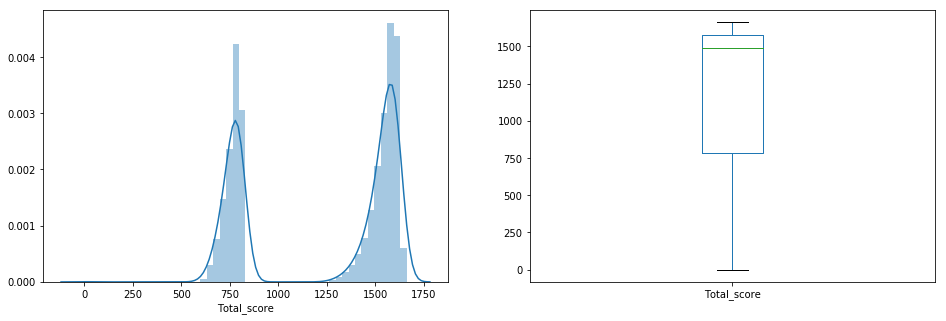

In [12]:
import seaborn as sns
plt.figure(1) 
plt.subplot(121)
sns.distplot(df_train['Total_score']); 
plt.subplot(122) 
df_train['Total_score'].plot.box(figsize=(16,5)) 
plt.show()

In [14]:
# df_train['unpaid_']=(df_train['unpaid_principal_bal']*df_train['interest_rate'])/df_train['loan_term']
# df_test['unpaid_']=(df_test['unpaid_principal_bal']*df_test['interest_rate'])/df_train['loan_term']

In [0]:
# df_train.drop('unpaid_',axis=1,inplace=True)
# df_test.drop('unpaid_',axis=1,inplace=True)

In [0]:
# df_train.drop('Total_score',axis=1,inplace=True)
# df_test.drop('Total_score',axis=1,inplace=True)


In [0]:
# df_train['unpaid_']

In [15]:
df_train.drop(columns=['co-borrower_credit_score','borrower_credit_score'],axis=1,inplace=True)
df_test.drop(columns=['co-borrower_credit_score','borrower_credit_score'],axis=1,inplace=True)

In [16]:
# df_train.boxplot(column='Total_score')
# plt.suptitle("")

In [17]:
df_train['m13'].value_counts(normalize=True)

0    0.99452
1    0.00548
Name: m13, dtype: float64

## plot Categorical variables

In [0]:
plt.figure(1) 
plt.subplot(221) 
df_train['source'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'source') 
plt.subplot(222) 
df_train['financial_institution'].value_counts(normalize=True).plot.bar(title= 'financial_institution') 
plt.subplot(223) 
df_train['loan_purpose'].value_counts(normalize=True).plot.bar(title= 'loan_purpose') 
# plt.subplot(224) train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

In [0]:
print(df_train.shape)
print(df_test.shape)

(116058, 29)
(35866, 27)


In [18]:
# string_value=[]
# index_value=[]
# for ind,i in enumerate(df_train.dtypes):
#     if i=='object':
#         string_value.append(df_train.dtypes.index[ind])
#         index_value.append(ind)

## Ploting the categorical variables for distribution 

In [19]:
def draw_conditional_barplot(feature,df):
    # Set matplotlib style
    plt.style.use('fivethirtyeight')
    # Count the total yes responses in our dataset
    n_yes = len(df[df.m13 == 1])
    # Count the total no responses in our dataset
    n_no = len(df[df.m13 == 0])
    # Count the frequencies of the different jobs for the yes people
    yes_cnts = df[df.m13 == 1][feature].value_counts() / n_yes * 100
    # Count frequencies of jobs for the nay sayers
    no_cnts = df[df.m13 == 0][feature].value_counts() / n_no * 100
    
    # A potential problem of creating two different frequency tables is that if one group (perhaps the yes crowd)...
    # ... does not include a certain category (like a certain job) then it will not be in the frequency tables at all
    # ... So we have to join them in one table to ensure that all categories are included
    # ... When merging the frequncy tables, missing categories will be marked with 'NA'
    # ... We can then replace all NAs with zeros, which is the correct frequency
    
    # Create a new dataframe that includes all frequencies
    res = pd.concat([yes_cnts,no_cnts],axis=1)
    # Name the columns of the new dataframe (yes crowd and nay sayers)
    res.columns = ['yes','no']
    # Fill empty fields with zeros
    res = res.fillna(0)
    
    # N = number of categories
    N = len(res['yes'])
    # Create an array for the locations of the group (creates an array [0,1,2,...,N])
    ind = np.arange(N) 
    # Specify width of bars
    width = 0.35   
    # Create empty matplotlib plot
    fig, ax = plt.subplots()
    # Add bars of the nay sayers
    rects1 = ax.bar(ind, res['no'], width)
    # Add bars of the yes crowd
    rects2 = ax.bar(ind + width, res['yes'], width)

    # Add label: feature name (e.g. job) in percent
    ax.set_ylabel(feature + ' in percent')
    # Add title
    ax.set_title(feature + ' by conversion')
    # Add ticks 
    ax.set_xticks(ind + width / 2)
    # Add categorie names as tick labels
    ax.set_xticklabels(res.index.values)
    # Rotate labels 90 degrees
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90)

    # Add legend
    ax.legend((rects1[0], rects2[0]), ('No', 'Yes'))
    
    # Render plot
    plt.show()

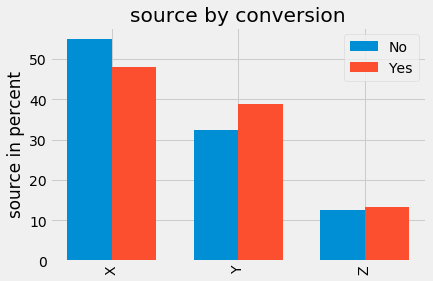

In [20]:
draw_conditional_barplot('source',df_train)

## converting to datetime

In [26]:
df_train['origination_date']=pd.to_datetime(df_train["origination_date"])
df_test['origination_date']=pd.to_datetime(df_test["origination_date"])

In [27]:
df_train['first_payment_date']=pd.to_datetime(df_train["first_payment_date"])
df_test['first_payment_date']=pd.to_datetime(df_test["first_payment_date"])


In [28]:
df_train['payment_difference']=abs((df_train['origination_date'].dt.month)-(df_train['first_payment_date'].dt.month))
df_test['payment_difference']=abs((df_test['origination_date'].dt.day)-(df_test['first_payment_date'].dt.day))


## Using imblearn for imbalanced data to scaling the data 

In [30]:
# help(SMOTE)

In [31]:
x_train=df_train.drop(columns=['m13','loan_id','origination_date','first_payment_date'],axis=1)
x_test=df_test.drop(columns=['loan_id','origination_date','first_payment_date'],axis=1)

In [33]:
# x_train['origination_date_new'] = pd.to_datetime(x_train.origination_date)


In [34]:
from sklearn import preprocessing

string_value=[]
index_value=[]
for ind,i in enumerate(x_train.dtypes):
    if i=='object':
        string_value.append(x_train.dtypes.index[ind])
        index_value.append(ind)

In [0]:
input_x_array = np.array(x_train)
# input_x_test_array=np.array(x_test)

for i in index_value:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(input_x_array[:,i]))
    input_x_array[:, i] = lbl.transform(input_x_array[:, i])

## Random Over sampling

In [0]:
from imblearn.over_sampling import SMOTE
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='auto',k_neighbors=15,ratio='minority',m_neighbors=15, random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(input_x_array, df_train.m13)

## Random Under sampling 

In [0]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_train_miss, y_train_miss = nr.fit_sample(input_x_array, df_train.m13) 

In [0]:
X_train_miss.shape

(1272, 26)

In [0]:
help(SMOTE)

Help on class SMOTE in module imblearn.over_sampling._smote:

class SMOTE(SVMSMOTE, BorderlineSMOTE)
 |  Class to perform over-sampling using SMOTE.
 |  
 |  This object is an implementation of SMOTE - Synthetic Minority
 |  Over-sampling Technique as presented in [1]_.
 |  
 |  Read more in the :ref:`User Guide <smote_adasyn>`.
 |  
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict or callable, (default='auto')
 |      Sampling information to resample the data set.
 |  
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the majority class over the number of samples in the
 |        minority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{os} = N_{M} / N_{rm}` where :math:`N_{rm}` and
 |        :math:`N_{M}` are the number of samples in the minority class after
 |        resampling and the number of samples in the majority class,
 |        respectively.
 |  
 |          .. warnin

In [0]:
lbl.fit_transform(input_x_array[0])

In [0]:
# string_value=[]
index_value_test=[]
for ind,i in enumerate(x_test.dtypes):
    if i=='object':
#         string_value.append(x_test.dtypes.index[ind])
        index_value_test.append(ind)

input_x_test_array=np.array(x_test)
for i in index_value:
#     lbl = preprocessing.LabelEncoder()
#     lbl.fit(list(input_x_test_array[:,i]))
    input_x_test_array[:, i] = lbl.fit_transform(input_x_test_array[:, i])

In [0]:
df_train.m13.value_counts()

In [35]:
## Random Forest classifier 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# forest_clf = RandomForestClassifier(n_estimators=150, random_state=42,class_weight='balanced')
# forest_scores = cross_val_score(forest_clf, Xsm_train, ysm_train, cv=3)
# forest_scores.mean()

In [0]:
forest = RandomForestClassifier(n_estimators=135, random_state=42,class_weight='balanced')
forest.fit(Xsm_train,ysm_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=135, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [0]:
logist=LogisticRegression(random_state=0)
logist.fit(Xsm_train,ysm_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# y_pred_logit=logist.predict(input_x_test_array)
y_logist_pred=pd.DataFrame(y_pred_logit,columns=['m13'])

In [0]:
y_logist_pred['m13'].value_counts()

0    27721
1     8145
Name: m13, dtype: int64

## XGboost got highest accuracy by using under sampling the data

In [0]:
from xgboost import XGBClassifier
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train_miss,y_train_miss)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_forest=forest.predict(input_x_test_array)
forest.score(x_test,y_test)

In [0]:
pred_=pd.DataFrame(y_pred_forest,columns=['m13'])
pred_.index=pred_.index+1
pred_.to_csv("random_forest_test2.csv")

In [0]:
pred_.m13.value_counts()

In [0]:
y_xgboost_pred=model_xgboost.predict(input_x_test_array)
pred_xg=pd.DataFrame(y_xgboost_pred,columns=['m13'])


In [0]:
pred_xg['m13'].value_counts()
pred_xg.to_csv("xgboost.csv")